## Problem Statement:
In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows:
Data Set Information:
Extraction was done by Barry Becker from the 1994 Censusdatabase. A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
Attribute Information:
Listing of attributes: >50K, <=50K.


Columns description
* age: Person’s age -->*continous 

* workclass: The type of work. ( Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,Local-gov, State-gov, Without-pay, Never-worked) --> *categorical

* fnlwgt: -->fnlwght stands for Final Weight of the observation *continous

* education: The level of education acquired by the person. ( Bachelors, Some-college, 11th, HS-grad, Prof-school,Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,10th,Doctorate, 5th-6th, Preschool.) -->*categorical

* education_num: Numerical representation of the level of education -->*continous

* marital_status: The status of maritage. (married, divorced, never-married, …) -->*categorical

* occupation: The role the person plays in its job. (Exec-managerial, Sales, Craft-repair, …) -->*categorical

* relationship: The role the persons assume in their family relationship. (Wife, Husband, Own-child, …) -->*categorical

* race: Person’s race. (Black, White, Asian, -->*categorical

* sex: Person’s biological gender. -->*categorical

* capital_gain: Capital gain for the person -->*continous

* capital_loss: Capital loss for the person -->*continous

* hours_per_week: The total hours worked in the weekend

* native_country: Person’s born country -->*categorical

* high_income: > $50K or ≤ $50K --> *categorical

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score


Bad key "text.kerning_factor" on line 4 in
C:\Users\user\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data=pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.isnull().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

## EDA

In [5]:
num_cols = data.select_dtypes(exclude='object').copy()
cat_cols = data.select_dtypes(include='object').copy()


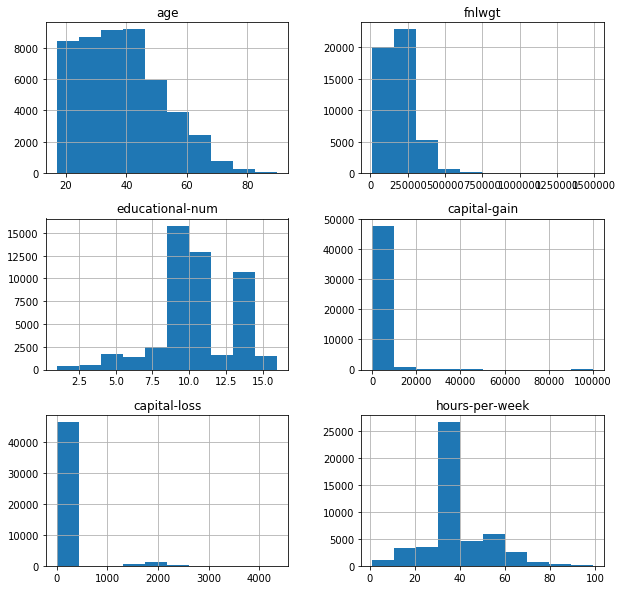

In [6]:
data.hist(figsize=(10,10))
plt.show()

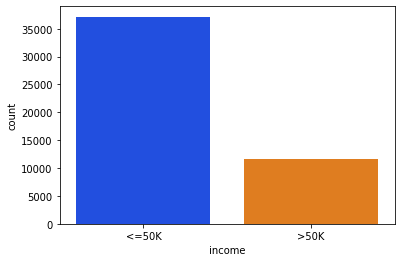

In [7]:
sns.countplot(data["income"],palette="bright")

In [8]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

### Data Cleaning

In [9]:
# the code will replace the special character '?' to nan

for items in data.columns:
    data[items].replace('?', np.nan,inplace=True)
#data

In [10]:
# drop uneeded columns
data.drop(['education'], inplace=True,axis=1)
data.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

Dropped the education feature( duplicate feature of education_num in a nonnumerical format)
The matching education level of the education number:

**1**: Preschool, **2**: 1st-4th, **3**: 5th-6th, **4**: 7th-8th, **5**: 9th, **6**: 10th, **7**: 11th, **8**: 12th, **9**: HS-grad,

**10**: Some-college, **11**: Assoc-voc, **12**: Assoc-acdm, **13**: Bachelors, **14**: Masters, **15**: Prof-school, **16**: Doctorate

In [11]:
# check duplicates and remove it
print("Before removing duplicates:", data.duplicated().sum())

data = data[~data.duplicated()]

print("After removing duplicates:", data.duplicated().sum())

Before removing duplicates: 52
After removing duplicates: 0


In [12]:
#value_counts of all features
for feature in data.columns:
    if data[feature].dtype == 'object':
        
        print('_'*10,feature, end=" ",)
        print('_'*10)
        print(data[feature].value_counts())

__________ workclass __________
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
__________ marital-status __________
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64
__________ occupation __________
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64
__________ re

In [13]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


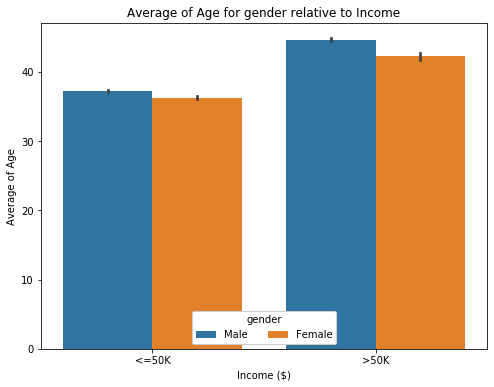

In [14]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sns.barplot(data = data, x = 'income', y = 'age', hue = 'gender')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'gender')
plt.title('Average of Age for gender relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

- The figure shows in general that the people with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.

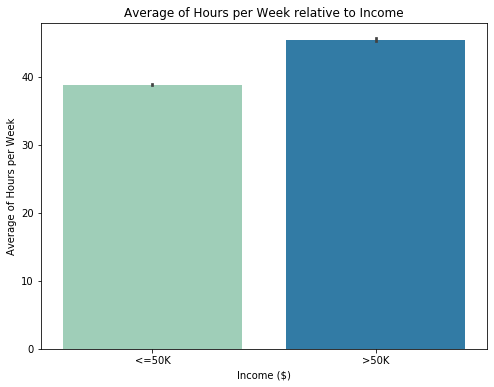

In [15]:
# Bar Chart 
plt.figure(figsize=[8,6])
sns.barplot(data=data, x='income', y='hours-per-week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

- We notice here that the income grows directly with the average of work hours per week, which is a pretty reasonable and logical result.

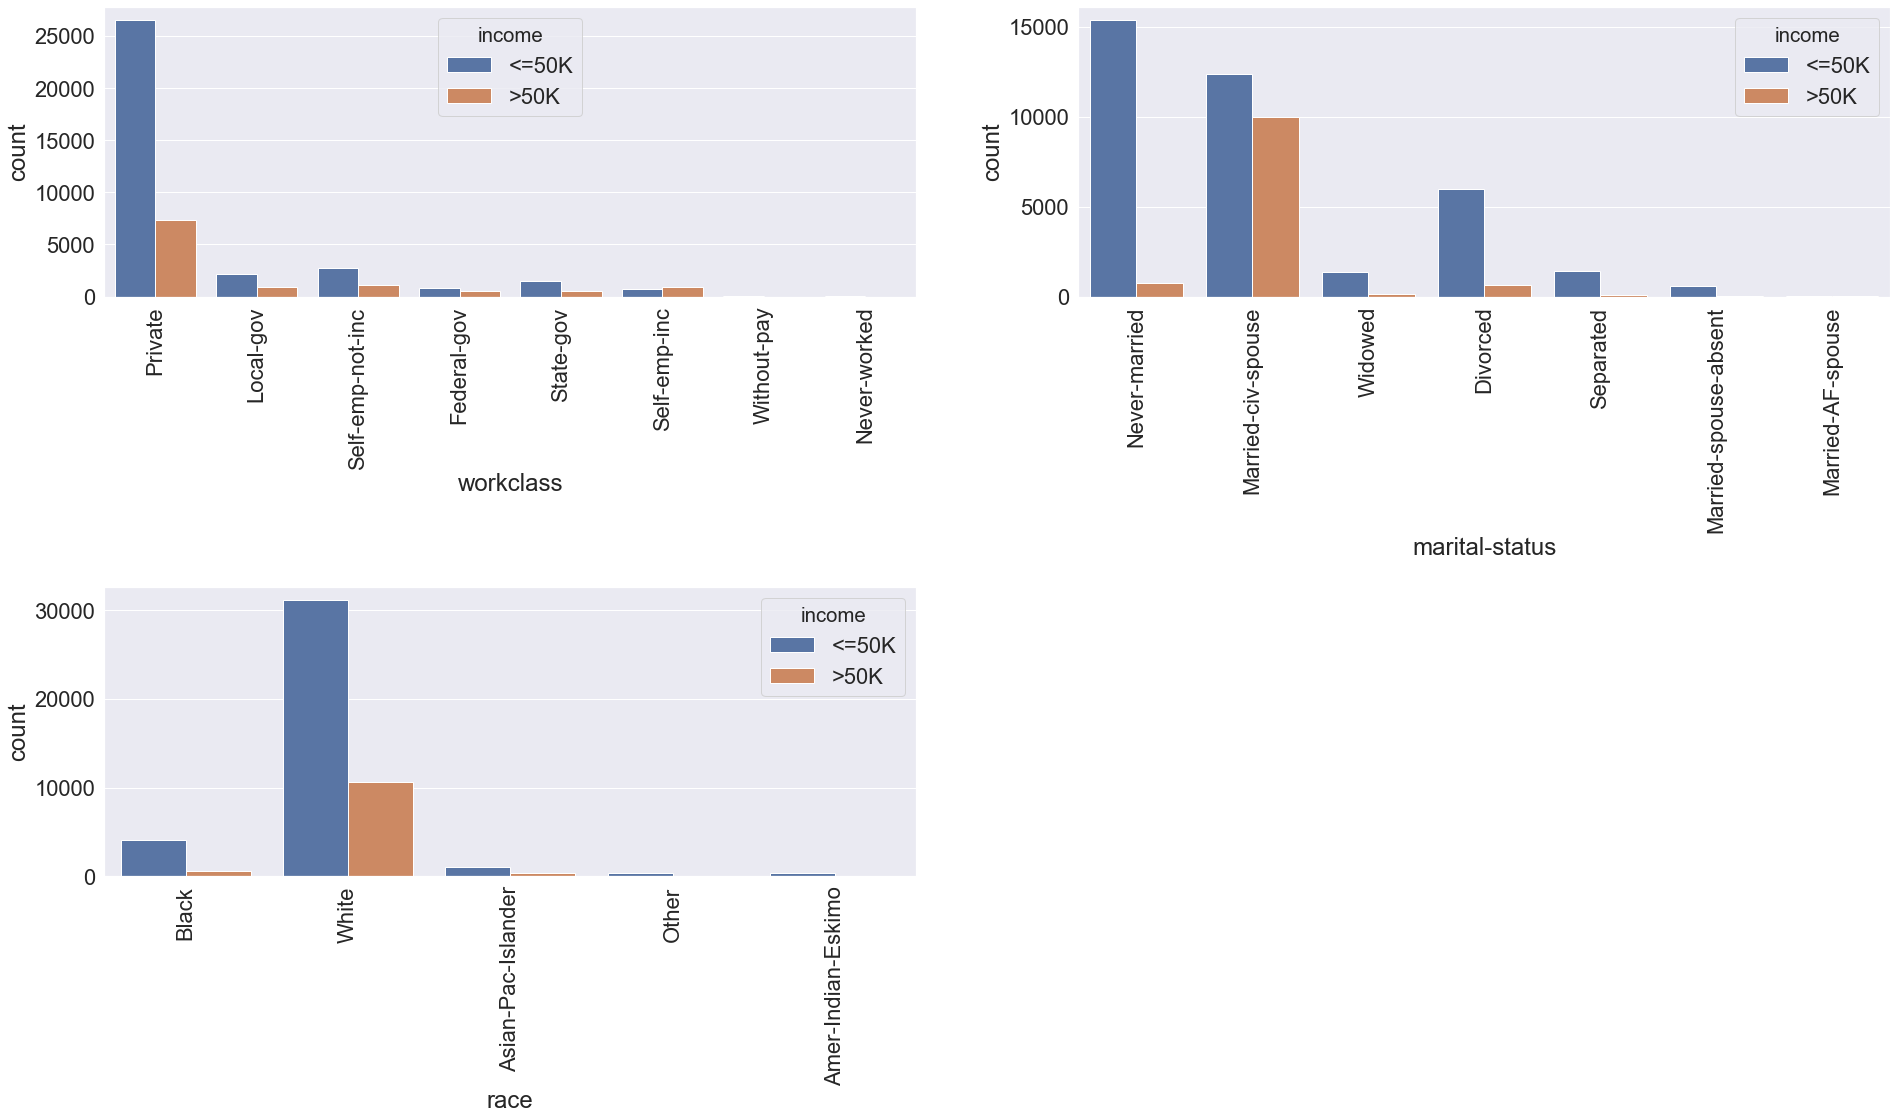

In [16]:
sns.set(font_scale=2)
plt.figure(figsize=(32,16)) 
#plt.rcParams.update({'font.size': 20}) 
plt.subplot(221)
sns.countplot(data["workclass"],hue=data["income"])
plt.xticks(rotation=90) 

plt.subplot(222)
sns.countplot(data["marital-status"],hue=data["income"])
plt.xticks(rotation=90)



plt.subplot(223)
sns.countplot(data["race"],hue=data["income"])
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=1) 
plt.show()

## Correlation -Check

In [17]:
data.corr() 

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076451,0.030635,0.077185,0.056838,0.071223
fnlwgt,-0.076451,1.000000,-0.038727,-0.003715,-0.004378,-0.013521
educational-num,0.030635,-0.038727,1.000000,0.125219,0.080986,0.143915
capital-gain,0.077185,-0.003715,0.125219,1.000000,-0.031475,0.082152
capital-loss,0.056838,-0.004378,0.080986,-0.031475,1.000000,0.054431
hours-per-week,0.071223,-0.013521,0.143915,0.082152,0.054431,1.000000


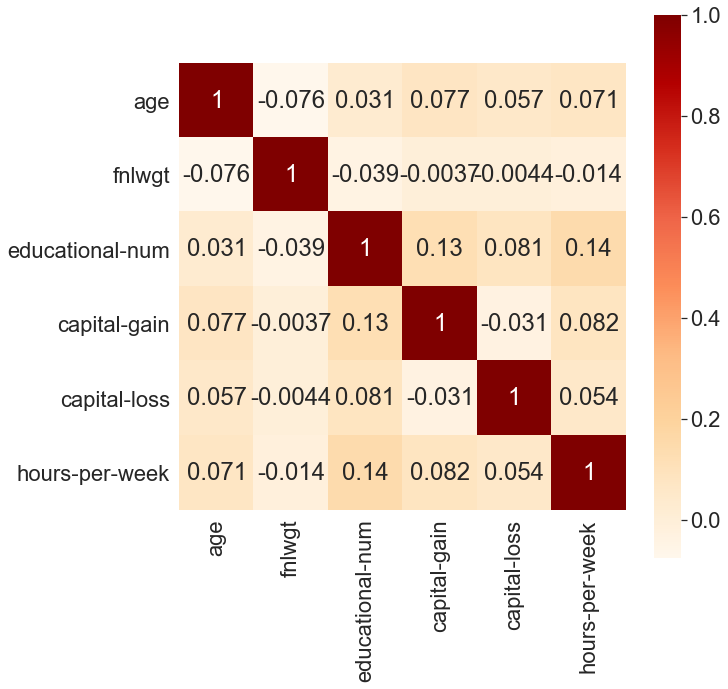

In [18]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),square=True,cmap="OrRd", annot = True)

In [19]:
# plt.figure(figsize=(14,10))
# sns.heatmap(data.corr(),annot=True,fmt='.2f')
# plt.show()


## Handiling Categorical Features

In [20]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [21]:
#label the income objects as 0 and 1
data['income']=data['income'].map({'<=50K': 0, '>50K': 1})
# data

In [22]:
# Splitting the data
X=data.drop('income',axis=1)
y=data['income']

In [23]:
X=X.drop(['native-country'],axis=1)

In [24]:
X['marital-status'].value_counts()

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [25]:
#we can reformat marital.status values to single and married
X['marital-status']=X['marital-status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single', 'Never-married':'Single', 'Separated':'Single', 
'Widowed':'Single', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})
#X

In [26]:
X['marital-status'].value_counts()

Single     25760
Married    23030
Name: marital-status, dtype: int64

In [27]:
X['marital-status']=X['marital-status'].map({'Single' : '0','Married' : '1'})
#X

In [28]:
X['gender']=X['gender'].map({'Male' : '0','Female' : '1'}).astype(int)
# X

In [29]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt']

scaler = MinMaxScaler()
X[numerical] = scaler.fit_transform(X[numerical])

In [30]:
X.sample(3)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
1753,0.753425,Private,0.160525,9,0,Priv-house-serv,Not-in-family,White,1,0.0,0.0,0.244898
30621,0.054795,Private,0.128735,8,0,Adm-clerical,Other-relative,Black,0,0.0,0.0,0.479592
18395,0.109589,Private,0.052774,13,0,Exec-managerial,Own-child,White,0,0.0,0.0,0.397959


In [31]:
# Create dummy variables for applying one hot encoding to the rest of the categoical features
X = pd.get_dummies(X)

In [34]:
encoded = list(X.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

42 total features after one-hot encoding.


In [33]:
X.dtypes

age                             float64
fnlwgt                          float64
educational-num                   int64
gender                            int32
capital-gain                    float64
capital-loss                    float64
hours-per-week                  float64
workclass_Federal-gov             uint8
workclass_Local-gov               uint8
workclass_Never-worked            uint8
workclass_Private                 uint8
workclass_Self-emp-inc            uint8
workclass_Self-emp-not-inc        uint8
workclass_State-gov               uint8
workclass_Without-pay             uint8
marital-status_0                  uint8
marital-status_1                  uint8
occupation_Adm-clerical           uint8
occupation_Armed-Forces           uint8
occupation_Craft-repair           uint8
occupation_Exec-managerial        uint8
occupation_Farming-fishing        uint8
occupation_Handlers-cleaners      uint8
occupation_Machine-op-inspct      uint8
occupation_Other-service          uint8


In [35]:
X.isnull().sum()

age                             0
fnlwgt                          0
educational-num                 0
gender                          0
capital-gain                    0
capital-loss                    0
hours-per-week                  0
workclass_Federal-gov           0
workclass_Local-gov             0
workclass_Never-worked          0
workclass_Private               0
workclass_Self-emp-inc          0
workclass_Self-emp-not-inc      0
workclass_State-gov             0
workclass_Without-pay           0
marital-status_0                0
marital-status_1                0
occupation_Adm-clerical         0
occupation_Armed-Forces         0
occupation_Craft-repair         0
occupation_Exec-managerial      0
occupation_Farming-fishing      0
occupation_Handlers-cleaners    0
occupation_Machine-op-inspct    0
occupation_Other-service        0
occupation_Priv-house-serv      0
occupation_Prof-specialty       0
occupation_Protective-serv      0
occupation_Sales                0
occupation_Tec

In [36]:
y.isnull().sum()

0

There ae no missing values 

## Modelling

In [37]:
#splitting the data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.8658390185342429

In [40]:
# cheking initial test accuracy
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8632233381157342

### Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [45]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [46]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.844, total=   0.7s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.839, total=   0.9s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.851, total=   0.6s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.840, total=   0.5s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.845, total=   0.6s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.859, total=   2.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.851, total=   2.9s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.865, total=   2.4s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.852, total=   3.3s
[CV]  l

[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.860, total=  27.9s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.870, total=  26.9s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.862, total=  26.6s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.875, total=  26.0s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.856, total=   3.3s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.852, total=   3.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.860, total=   3

[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.870, total=   7.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.867, total=   7.2s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.873, total=   6.6s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.865, total=   6.7s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.878, total=   7.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=0.869, total=  13.2s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=0.865, 

[CV]   learning_rate=0.1, max_depth=3, n_estimators=10, score=0.840, total=   0.8s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=10, score=0.845, total=   0.6s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.859, total=   2.3s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.851, total=   2.8s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.865, total=   2.2s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.852, total=   2.3s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.863, total= 

[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.860, total=  27.9s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.870, total=  28.2s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.862, total=  26.9s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.875, total=  27.6s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=10, score=0.856, total=   3.2s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=10, score=0.852, total=   3.1s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=10, score=0.8

[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.870, total=   3.7s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.870, total=   6.7s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.867, total=   6.6s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.873, total=   7.9s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.865, total=   6.8s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.878, total=   7.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0

[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.851, total=   1.0s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.840, total=   0.6s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.845, total=   0.6s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.859, total=   2.4s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.851, total=   3.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.865, total=   2.5s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=

[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.869, total=  27.0s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.860, total=  27.0s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.870, total=  27.2s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.862, total=  26.6s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.875, total=  27.1s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=20, n_estimators=10, score=0.856, total=   2.8s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=20, n_estimator

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 99.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50,

In [ ]:
# To  find the parameters givingmaximum accuracy
grid.best_params_

In [ ]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 50)
new_model.fit(train_x, train_y)

In [ ]:
y_pred_new = new_model.predict(test_x)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(test_y,predictions_new)
accuracy_new

As we have increased the accuracy of the model, we'll save this model

In [ ]:
#save both xgboost and minmaxscala model
# filename = 'xgboost_model.pickle'
# pickle.dump(new_model, open(filename, 'wb'))

# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# Trying a random prediction
d=scaler_model.transform([[6,4,72,35,80,33.6,0.627,50]])
pred=loaded_model.predict(d)
print('This data belongs to class :',pred[0])

In [32]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')